<h1 style= 'text-align: center;'>Book Recommendation </h1> 

## Name:- Parth Suhas Mane

## Business Objective:
### Generate the features from the dataset and use them to recommend the books accordingly to the users.

## Contents:
The Book-Crossing dataset comprises 3 files.
1. Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.
2. Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.
3. Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing Datasets

## 1. Users

In [6]:
users= pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Let's change some column names in the Datasets so they are machine friendly!

In [7]:
users.rename(columns={'User-ID':'userid'}, inplace= True)
users.head(2)

,userid,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [8]:
users.shape

(278858, 3)

There are 278858 rows and 3 columns in the users dataset

## 2. Books

In [9]:
books= pd.read_csv('Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books.rename(columns={'Book-Title':'title', 'Book-Author': 'author', 'Year-Of-Publication': 'year', 'Publisher': 'publisher',
                     'Image-URL-S': 'img_url_s', 'Image-URL-M': 'img_url_m', 'Image-URL-L': 'img_url_l'}, inplace= True)
books.head(2)

,ISBN,title,author,year,publisher,img_url_s,img_url_m,img_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [11]:
books.shape

(271360, 8)

There are 271360 rows and 8 columns in books datasets

## 3. Ratings

In [12]:
ratings= pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
ratings.rename(columns={'User-ID':'userid', 'Book-Rating': 'ratings'}, inplace= True)
ratings.head(2)

,userid,ISBN,ratings
0,276725,034545104X,0
1,276726,0155061224,5


In [14]:
ratings.shape

(1149780, 3)

There are 1149780 rows and 3 columns in ratings dataset

#### So we have imported all the required Datasets

## EDA

In [15]:
print(users.shape)
print(books.shape)
print(ratings.shape)

(278858, 3)
(271360, 8)
(1149780, 3)


Here we can see that ratings has more rows as compared to other two datasets.

In [16]:
# Null values
users.isnull().sum()

userid           0
Location         0
Age         110762
dtype: int64

We can see that age column has massive data absent.

In [17]:
books.isnull().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
img_url_s    0
img_url_m    0
img_url_l    3
dtype: int64

There are very few null values in books dataset

In [18]:
ratings.isnull().sum()

userid     0
ISBN       0
ratings    0
dtype: int64

There are no null values in ratings dataset

In [19]:
# checking Duplicate rows
users.duplicated().sum()

0

In [20]:
books.duplicated().sum()

0

In [21]:
ratings.duplicated().sum()

0

There are no Duplicate rows in any Datasets

## Merging all Three Datasets into one DataFrame

In [22]:
ratings_with_books= ratings.merge(books, on= 'ISBN')
ratings_with_books

,userid,ISBN,ratings,title,author,year,publisher,img_url_s,img_url_m,img_url_l
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [23]:
df=ratings_with_books.merge(users, on = 'userid')
df

,userid,ISBN,ratings,title,author,year,publisher,img_url_s,img_url_m,img_url_l,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.0


In [24]:
df = df[['ISBN','userid','ratings','title','year','author','Age','Location','img_url_s','img_url_m','img_url_l']]
df

,ISBN,userid,ratings,title,year,author,Age,Location,img_url_s,img_url_m,img_url_l
0,034545104X,276725,0,Flesh Tones: A Novel,2002,M. J. Rose,NaN,"tyler, texas, usa",http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,034545104X,2313,5,Flesh Tones: A Novel,2002,M. J. Rose,23.0,"cincinnati, ohio, usa",http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,0812533550,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),1986,Orson Scott Card,23.0,"cincinnati, ohio, usa",http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...
3,0679745580,2313,8,In Cold Blood (Vintage International),1994,TRUMAN CAPOTE,23.0,"cincinnati, ohio, usa",http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...
4,0060173289,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,1996,Rebecca Wells,23.0,"cincinnati, ohio, usa",http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...
...,...,...,...,...,...,...,...,...,...,...,...
1031131,2862749796,276442,7,Le Huit,2002,Katherine Neville,62.0,"genève, genève, switzerland",http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...
1031132,3788097000,276618,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,1984,Ludwig Marum,NaN,"stuttgart, \n/a\""., germany""",http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...
1031133,0553571001,276647,0,Christmas With Anne and Other Holiday Stories:...,2001,L. M. Montgomery,13.0,"arlington heights, illinois, usa",http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...
1031134,0689822294,276647,10,Heaven (Coretta Scott King Author Award Winner),1998,Angela Johnson,13.0,"arlington heights, illinois, usa",http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...


# Exploratory Data Analysis

In [25]:
# Checking shape
df.shape

(1031136, 11)

There are 1031136 rows and 11 columns

In [26]:
df.describe()

,userid,ratings,Age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ISBN       1031136 non-null  object 
 1   userid     1031136 non-null  int64  
 2   ratings    1031136 non-null  int64  
 3   title      1031136 non-null  object 
 4   year       1031136 non-null  object 
 5   author     1031135 non-null  object 
 6   Age        753301 non-null   float64
 7   Location   1031136 non-null  object 
 8   img_url_s  1031136 non-null  object 
 9   img_url_m  1031136 non-null  object 
 10  img_url_l  1031132 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.4+ MB


The data types of each features is correctly identified, also we can see that there are many null values in age column

In [28]:
#checking Missing values 
df.isnull().sum()

ISBN              0
userid            0
ratings           0
title             0
year              0
author            1
Age          277835
Location          0
img_url_s         0
img_url_m         0
img_url_l         4
dtype: int64

Age having many null values is confirmed! other null values can be overlooked as they are very minimum

We will drop this column as age cannot be predicted.

In [29]:
df= df.drop('Age', axis = 1)
df

,ISBN,userid,ratings,title,year,author,Location,img_url_s,img_url_m,img_url_l
0,034545104X,276725,0,Flesh Tones: A Novel,2002,M. J. Rose,"tyler, texas, usa",http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,034545104X,2313,5,Flesh Tones: A Novel,2002,M. J. Rose,"cincinnati, ohio, usa",http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,0812533550,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),1986,Orson Scott Card,"cincinnati, ohio, usa",http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...
3,0679745580,2313,8,In Cold Blood (Vintage International),1994,TRUMAN CAPOTE,"cincinnati, ohio, usa",http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...
4,0060173289,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,1996,Rebecca Wells,"cincinnati, ohio, usa",http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,2862749796,276442,7,Le Huit,2002,Katherine Neville,"genève, genève, switzerland",http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...
1031132,3788097000,276618,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,1984,Ludwig Marum,"stuttgart, \n/a\""., germany""",http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...
1031133,0553571001,276647,0,Christmas With Anne and Other Holiday Stories:...,2001,L. M. Montgomery,"arlington heights, illinois, usa",http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...
1031134,0689822294,276647,10,Heaven (Coretta Scott King Author Award Winner),1998,Angela Johnson,"arlington heights, illinois, usa",http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...


In [30]:
#Check duplicate rows in dataset
df[df.duplicated()]

,ISBN,userid,ratings,title,year,author,Location,img_url_s,img_url_m,img_url_l


There are No Duplicate rows

In [31]:
#check Correlation
df.corr()

,userid,ratings
userid,1.000000,-0.044021
ratings,-0.044021,1.000000


## Visualization

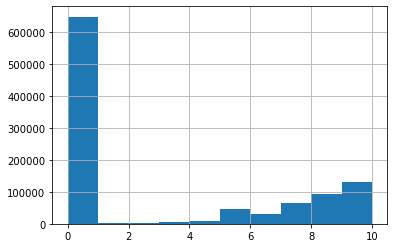

In [32]:
# Histogram
df['ratings'].hist()
plt.show()

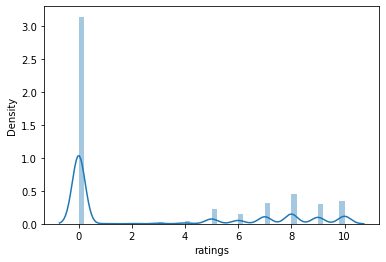

In [33]:
# Ratings Distplot
sns.distplot(df['ratings'])
plt.show()

In [34]:
df['ratings'].skew()

0.7524189628269683

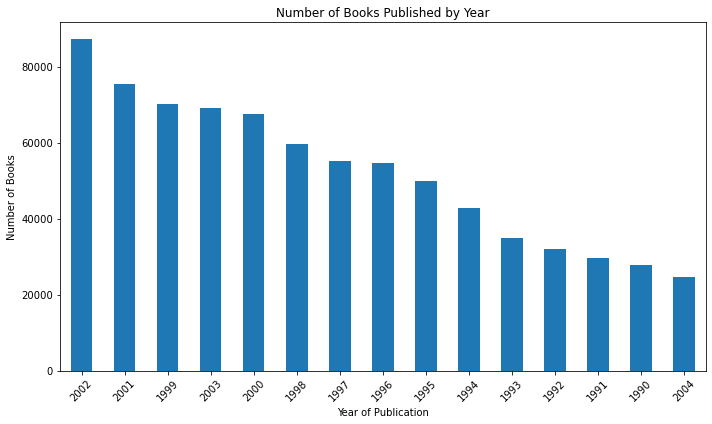

In [35]:
# Bar-graph

# Number of Books Plublished by Year

# Group the data by Year-Of-Publication and count the number of books in each year
year_counts = df['year'].value_counts().sort_values(ascending=False)


# Top 10 years with the most books published
top_10_years = year_counts.head(15)

# Convert years to integers
top_10_years.index = top_10_years.index.astype(int)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

From this we can see that Majority books were published in the year 2002

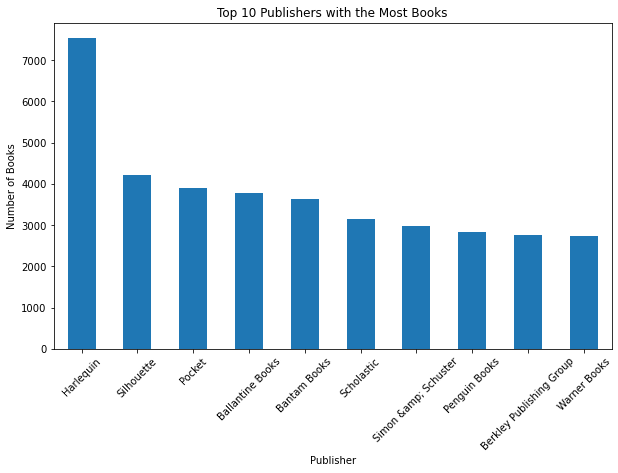

In [36]:
# Top 10 Publishers

top_publishers = books['publisher'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

Harlequin Publishers have published most books 

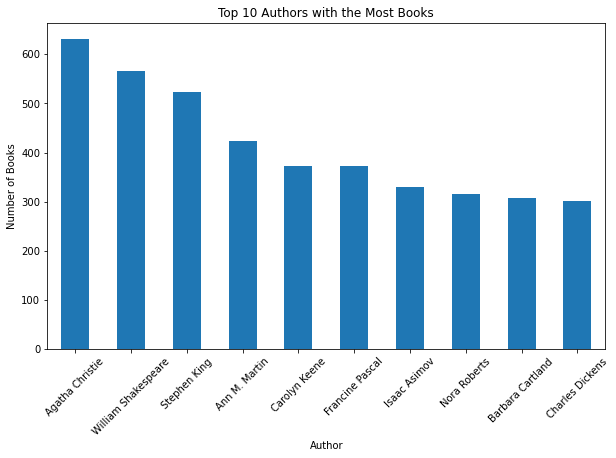

In [37]:
# top 10 Authors with the most books
top_authors = books['author'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

Author Agatha Christie has the most number of books published

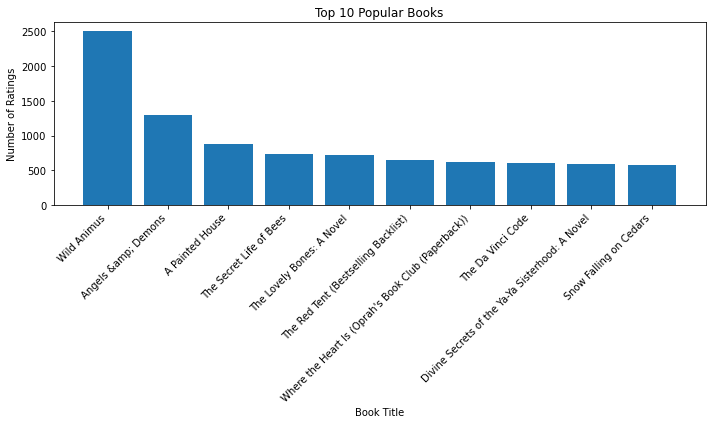

In [38]:
#Top 10 popular books
# Merge the books and ratings dataframes on the common ISBN column
merged_df = pd.merge(books, ratings, on='ISBN')

# Calculate the count of ratings for each book
book_ratings_count = merged_df['ISBN'].value_counts().head(10)

# Get the top 10 popular books based on ratings count
top_10_popular_books = books[books['ISBN'].isin(book_ratings_count.index)]

# Create a bar chart to visualize the top 10 popular books
plt.figure(figsize=(10, 6))
plt.bar(top_10_popular_books['title'], book_ratings_count)
plt.title('Top 10 Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Wild Animus is the top rated book with almost 2500 ratings

In [39]:
books_with_ratings = pd.merge(books, ratings, on='ISBN')

In [40]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

In [41]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=10),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [42]:
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

cat_summary_with_graph(books_with_ratings, 'ratings')

# Model Building

## 1. Popularity Based Recommendation System

In [43]:
ratings_with_name = ratings.merge(books, on = 'ISBN')

In [44]:
# Creating a dataframe for number of ratings on each book
Number_of_ratings_df = ratings_with_name.groupby('title').count()['ratings'].reset_index()
Number_of_ratings_df.rename(columns={'ratings':'num_of_ratings'}, inplace = True)
Number_of_ratings_df

,title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [45]:
# # Creating a dataframe for average number of ratings on each book
Avg_of_ratings_df = ratings_with_name.groupby('title').mean()['ratings'].reset_index()
Avg_of_ratings_df.rename(columns={'ratings':'avg_of_ratings'}, inplace = True)
Avg_of_ratings_df

,title,avg_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [46]:
popular_books = Number_of_ratings_df.merge(Avg_of_ratings_df, on = 'title')
popular_books

,title,num_of_ratings,avg_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [47]:
# Sort items by popularity in descending order
Book_popularity = popular_books.sort_values(by='num_of_ratings', ascending=False)
Book_popularity 

,title,num_of_ratings,avg_of_ratings
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193
...,...,...,...
147559,Real Love: The Truth About Finding Uncondition...,1,0.000000
147558,Real Love: The Drawings for Sean,1,10.000000
147557,"Real Love or Fake (Camfield Novel of Love, No 78)",1,5.000000
63664,Fabulous Food for Family and Friends: Healthy ...,1,0.000000


In [48]:
# Sorting only the most popular books that have ratings more than 300
Book_popularity = Book_popularity[Book_popularity['num_of_ratings']>=300].sort_values('avg_of_ratings', ascending= False).head(50)
Book_popularity

,title,num_of_ratings,avg_of_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219741,To Kill a Mockingbird,510,4.700000
183573,The Da Vinci Code,898,4.642539
187880,The Five People You Meet in Heaven,430,4.551163
180556,The Catcher in the Rye,449,4.545657


## This are top 50 most popular books

### Now lets get the Author, Publisher and Image URL

In [49]:
Book_popularity = Book_popularity.merge(books, on= 'title').drop_duplicates('title')[['title','author','num_of_ratings','avg_of_ratings','publisher','img_url_m']]
Book_popularity

,title,author,num_of_ratings,avg_of_ratings,publisher,img_url_m
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441,Scholastic,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453,Scholastic,http://images.amazon.com/images/P/0439064872.0...
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,4.948370,Del Rey,http://images.amazon.com/images/P/0345339703.0...
21,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,575,4.895652,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
23,To Kill a Mockingbird,Harper Lee,510,4.700000,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...
31,The Da Vinci Code,Dan Brown,898,4.642539,Doubleday,http://images.amazon.com/images/P/0385504209.0...
37,The Five People You Meet in Heaven,Mitch Albom,430,4.551163,Hyperion,http://images.amazon.com/images/P/0786868716.0...
39,The Catcher in the Rye,J.D. Salinger,449,4.545657,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...


In [50]:
# Recommend the most popular Book
def recommend_popular_books(Book_popularity, num_recommendations=5):
    return Book_popularity['num_of_ratings'][:num_recommendations]

# Get recommendations for a user (in this case, User1)
user_recommendations = recommend_popular_books(Book_popularity)
print("\nRecommendations for User1:")
print(user_recommendations)


Recommendations for User1:
0     428
3     387
5     347
9     556
12    368
Name: num_of_ratings, dtype: int64


# 2. Collaborative Based Recommendation

In Collaborative based Recommendation we will choose only those users who have rated more than 200 books as these users are profession readers and the books that have more than 50 times ratings. We cannot recommend books based on the readers who have read only few books.

In this way our Recommendation System will give accurate recommendations.

In [51]:
ratings_with_name.groupby('userid').count()['ratings']

userid
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: ratings, Length: 92106, dtype: int64

Here we can see the number of times users have rated the books.

Also we can the lenght as 92106. This means that there are 92106 users who have given ratings on the books.

In [52]:
# R_200 is the variable in which we have stored the users that have rated books more than 200 times
users_200 = ratings_with_name.groupby('userid').count()['ratings'] > 200
users_200 = users_200[users_200].index
users_200 = ratings_with_name[ratings_with_name['userid'].isin(users_200)]
users_200

,userid,ISBN,ratings,title,author,year,publisher,img_url_s,img_url_m,img_url_l
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [53]:
# ratings_50 is the variable in which we have stored books having more than equal to 50 ratings
ratings_50 = users_200.groupby('title').count()['ratings'] >= 50
ratings_50 = ratings_50[ratings_50].index

In [54]:
ratings_50 = users_200[users_200['title'].isin(ratings_50)]
ratings_50

,userid,ISBN,ratings,title,author,year,publisher,img_url_s,img_url_m,img_url_l
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


#### Now let us create a Pivot-table for collaborative filtering

In [55]:
pt = ratings_50.pivot_table(index = 'title', columns = 'userid', values = 'ratings')
pt.fillna(0, inplace = True)
pt

userid,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
pt.to_csv("pt.csv")

In [85]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=706)

In [56]:
pt.head(20)

userid,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Civil Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Day Late and a Dollar Short,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

Let us see the Euclidian Distance for each book 

In [58]:
similarity_scores = cosine_similarity(pt)

In [59]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

Here we can see the similarity of books with each other

In [75]:

def recommend(book_name):
    # fetch index
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1] , reverse = True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['img_url_s'].values))
        item.extend(list(temp_df.drop_duplicates('title')['img_url_m'].values))
        item.extend(list(temp_df.drop_duplicates('title')['img_url_l'].values))
        data.append(item)
    
    return data
      #  print(pt.index[i[0]])

In [81]:
recommend('1st to Die: A Novel')

[['Along Came a Spider (Alex Cross Novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446364193.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0446364193.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0446364193.01.LZZZZZZZ.jpg'],
 ['Roses Are Red (Alex Cross Novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446605484.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0446605484.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0446605484.01.LZZZZZZZ.jpg'],
 ['Pop Goes the Weasel',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693286.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0316693286.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0316693286.01.LZZZZZZZ.jpg'],
 ['Violets Are Blue',
  'James Patterson',
  'http://images.amazon.com/images/P/0446611212.01.THUMBZZZ.jpg',
  'http://images.amazon.com/images/P/0446611212.01.MZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0446611212.01.LZZZZ

In [72]:
np.where(pt.index=="To Kill a Mockingbird")

(array([650], dtype=int64),)

In [66]:
books.to_csv("New_book.csv")

In [63]:
import pickle

In [64]:
# Save cosine similarity and data to a pickle file
with open('cosine_similarity.pkl', 'wb') as file:
    pickle.dump((similarity_scores), file)

In [67]:
books


,ISBN,title,author,year,publisher,img_url_s,img_url_m,img_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [88]:
n_pt=pd.read_csv('pt.csv',index_col='title')

In [90]:
n_pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=706)